In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [48]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [40]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    e = y-np.dot(tx,w)
    n = e.shape[0]
    return (1/(2*n))*np.dot(e.T,e)

In [7]:
y.shape[0]

10000

# Grid Search

Fill in the function `grid_search()` below:

In [8]:
from itertools import product

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y,tx,np.array([w0[i],w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.046 seconds


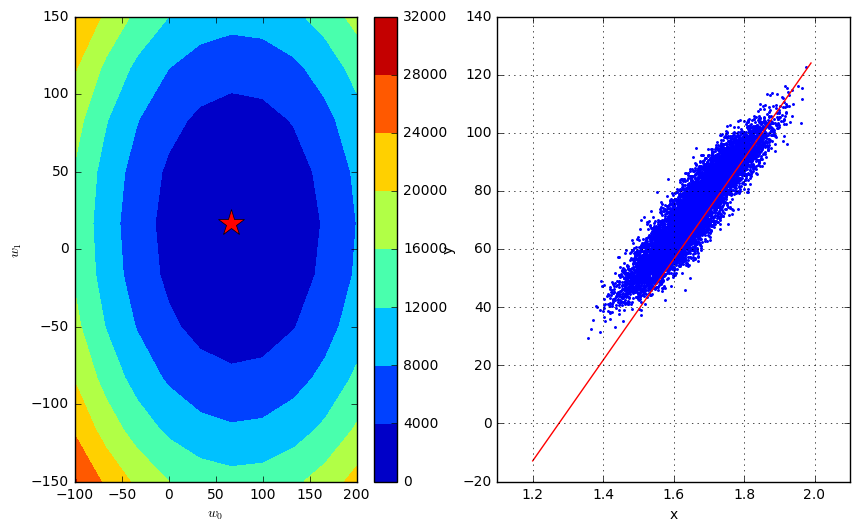

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - np.dot(tx,w)
    n = e.shape[0]
    return -(1/n)*np.dot(tx.T,e)

Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        g = compute_gradient(y,tx,w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*g
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=29.317568800842015, w1=5.391884973995655
Gradient Descent(1/49): loss=1015.0521848293535, w0=46.90811008134726, w1=8.627015958393
Gradient Descent(2/49): loss=375.2657547746187, w0=57.46243484965045, w1=10.5680945490314
Gradient Descent(3/49): loss=144.94263995491332, w0=63.79502971063234, w1=11.732741703414455
Gradient Descent(4/49): loss=62.02631861981966, w0=67.59458662722147, w1=12.431529996044297
Gradient Descent(5/49): loss=32.176442939185925, w0=69.87432077717496, w1=12.85080297162219
Gradient Descent(6/49): loss=21.430487694157765, w0=71.24216126714705, w1=13.10236675696893
Gradient Descent(7/49): loss=17.561943805947603, w0=72.06286556113031, w1=13.253305028176976
Gradient Descent(8/49): loss=16.169268006191956, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279921, w0=72.85074168335424, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631583, w0=73.02801381085462, w1=13.430

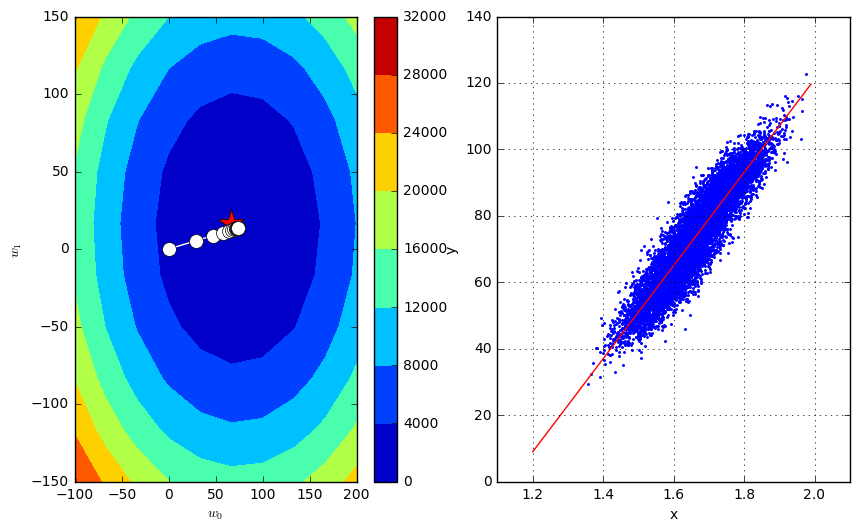

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [142]:
compute_stoch_gradient(y, tx, np.array([2,1]), 6).shape

(2,)

# Stochastic gradient descent

In [143]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient for batch data."""
    yn, xn = next(batch_iter(y,tx,batch_size))
    residuals_batch = np.array(list(map(lambda tup: -(tup[0]-np.dot(tup[1],w.T)), zip(yn,xn))))
    return np.dot(residuals_batch, xn)
    #yn, xn = yn[0], xn[0]
    #return -(yn-np.dot(xn,w.T))*xn


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_epochs):
        g = np.array([0,0])
        g = compute_stoch_gradient(y,tx,w,batch_size)
        g = (1/batch_size)*g
        loss = compute_loss(y, tx, w)
        w = w - gamma*g
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [144]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=23.479718199736052, w1=-6.607030607933064
Gradient Descent(1/49): loss=1457.8519611370025, w0=46.33093067609827, w1=1.5381525292681548
Gradient Descent(2/49): loss=450.18776498295165, w0=63.478179463094506, w1=21.745364583955833
Gradient Descent(3/49): loss=97.7207913887611, w0=65.87129302147012, w1=24.35763288126959
Gradient Descent(4/49): loss=102.09817497871543, w0=67.70655375690205, w1=25.090881817213756
Gradient Descent(5/49): loss=98.4048570339379, w0=67.88176720913543, w1=25.21489148640752
Gradient Descent(6/49): loss=98.88881130478771, w0=73.12002466763467, w1=21.63934255281768
Gradient Descent(7/49): loss=48.69078984018544, w0=70.47692321492099, w1=22.966841792173163
Gradient Descent(8/49): loss=64.35644067230041, w0=73.86331608054871, w1=21.07377925821195
Gradient Descent(9/49): loss=44.38291813490006, w0=73.73972810984611, w1=21.15827055228005
Gradient Descent(10/49): loss=44.96538679198674, w0=80.94919589769526, w1=12.53783

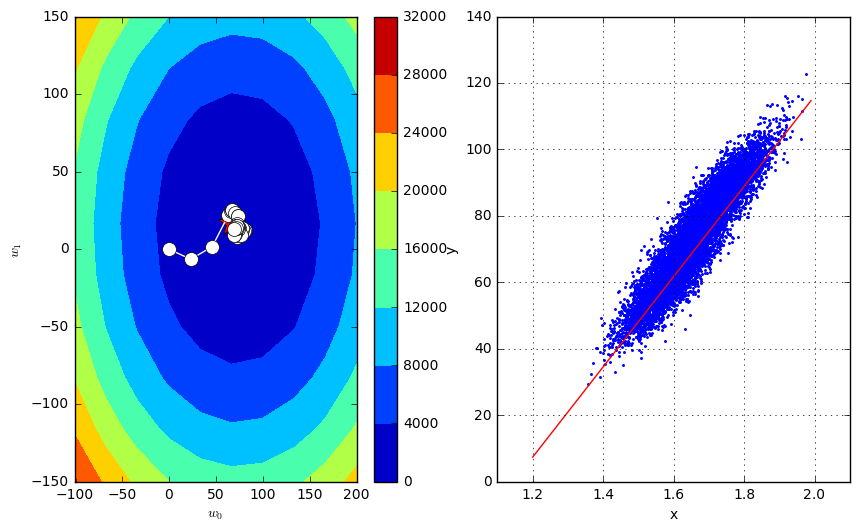

In [145]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))